In [899]:
from os.path import join
from os import listdir
import librosa
import matplotlib.pyplot as plt
import numpy as np
import json
import math

In [900]:
root = r"C:\Users\david\OneDrive - Danmarks Tekniske Universitet\S1-intsys\Eksamensprojekt"

path_wav = join(root, "DataWav")
path_beats_librosa = join(root, "Davids Rodemappe\data\data_snippet_bin_430.json")
path_beats_spect = join(root, "Davids Rodemappe\data\data_predictions_spect.json")
path_beats_wav = join(root, "Davids Rodemappe\data\data_predictions_wav.json")

# EXAMPLE_SONG = 19

In [901]:
# List files in path_wav
files = listdir(path_wav)
print(files[0:3])
print(len(files), "in total")

['1983-0-0.wav', '1983-0-23000.wav', '1983-0-78000.wav']
14546 in total


In [902]:
# Load beats from json file
with open(path_beats_spect) as f:
    spect_beats = json.load(f)

with open(path_beats_wav) as f:
    wav_beats = json.load(f)

with open(path_beats_librosa) as f:
    librosa_beats = json.load(f)

In [903]:
# Remove unused songs from librosa_beats
librosa_used = {}
for id in librosa_beats.keys():
    long_id = id+'-512-256.npy'
    if long_id in spect_beats.keys():
        librosa_used[long_id] = librosa_beats[id]

In [904]:
# Print first example in beats
print(list(spect_beats.keys())[EXAMPLE_SONG])
print(spect_beats[list(spect_beats.keys())[EXAMPLE_SONG]])
print(len(spect_beats), "beats from spect")

# Print dashed divider
print("-"*50)

print(list(wav_beats.keys())[EXAMPLE_SONG])
print(wav_beats[list(wav_beats.keys())[EXAMPLE_SONG]])
print(len(wav_beats), "beats from wav")

# Print dashed divider
print("-"*50)

print(list(librosa_used.keys())[EXAMPLE_SONG])
print(librosa_used[list(librosa_used.keys())[EXAMPLE_SONG]])
print(len(librosa_used), "beats from librosa")

1985-192-0-512-256.npy
[139.8, 722.3000000000001, 1351.4, 1864.0, 2563.0, 3238.7000000000003, 4124.1, 4636.7, 5335.7, 6011.400000000001, 6873.5, 7386.1, 8085.1, 8760.800000000001, 9296.7]
1408 beats from spect
--------------------------------------------------
1985-192-0-512-256.npy
[139.8, 838.8000000000001, 1537.8, 2213.5, 3075.6, 3588.2000000000003, 4310.5, 4986.2, 5685.2, 6337.6, 7036.6, 7735.6, 8644.300000000001, 9133.6, 9832.6]
1408 beats from wav
--------------------------------------------------
1985-192-0-512-256.npy
[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [905]:
# Remove unused from files
file_to_id = [k.split(".")[0]+"-512-256.npy" for k in files]
used_files = [k for k in file_to_id if k in list(spect_beats.keys())]
print(len(used_files), "in total after removing unused")

1408 in total after removing unused


In [906]:
# Get beats for the first song in files
y_spect_beats = spect_beats[used_files[EXAMPLE_SONG]]
print(y_spect_beats)

# Print dashed divider
print("-"*50)

y_wav_beats = wav_beats[used_files[EXAMPLE_SONG]]
print(y_wav_beats)

# Print dashed divider
print("-"*50)

y_librosa = enumerate(librosa_used[used_files[EXAMPLE_SONG]])
y_librosa_beats =  [_ * 23.3 for _, b in y_librosa if b == 1]
print(y_librosa_beats)

[139.8, 722.3000000000001, 1351.4, 1864.0, 2563.0, 3238.7000000000003, 4124.1, 4636.7, 5335.7, 6011.400000000001, 6873.5, 7386.1, 8085.1, 8760.800000000001, 9296.7]
--------------------------------------------------
[139.8, 838.8000000000001, 1537.8, 2213.5, 3075.6, 3588.2000000000003, 4310.5, 4986.2, 5685.2, 6337.6, 7036.6, 7735.6, 8644.300000000001, 9133.6, 9832.6]
--------------------------------------------------
[116.5, 652.4, 1188.3, 1700.9, 2213.5, 2726.1, 3238.7000000000003, 3774.6, 4310.5, 4823.1, 5335.7, 5848.3, 6337.6, 6873.5, 7386.1, 7922.0, 8434.6, 8947.2, 9483.1]


In [907]:
# Load first file using librosa
y, sr = librosa.load(join(path_wav, "-".join(used_files[EXAMPLE_SONG].split("-")[:3])+".wav"))
print(y)

[-1.0419899e-05  3.7845166e-06 -5.9667072e-06 ...  1.1731373e-02
  1.0335021e-02  1.2234143e-02]


27520
min -0.81859386 max 0.8435754 [-0.31034946 -0.27421367 -0.23717552 -0.1995389 ]


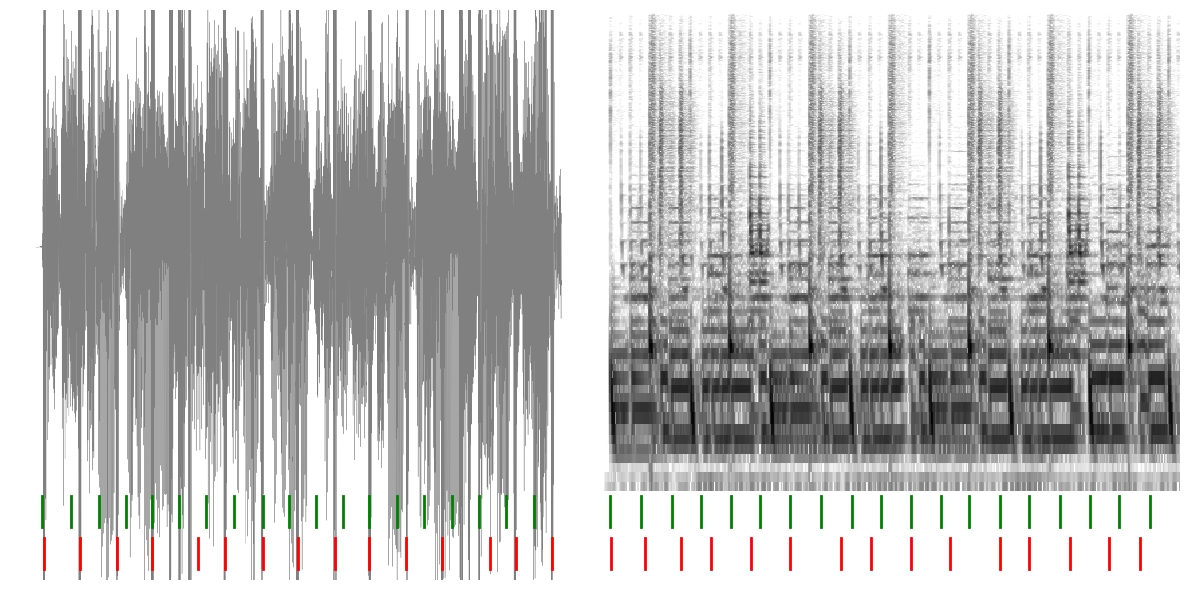

In [908]:
# Convert to spectrogram using librosa.stft
spectrogram = librosa.stft(y)

# Create blank plotting canvas
fig, (ax2, ax1) = plt.subplots(1, 2, figsize=(12, 6), facecolor='white')


eta = 0.02
y_low_1 = 0 + eta
y_high_1 = (1/12) - eta/2
y_low_2 = (1/12) + eta/2
y_high_2 = (2/12) - eta


# Plot spectrogram
librosa.display.specshow(librosa.amplitude_to_db(np.abs(spectrogram), ref=np.max), y_axis='log', x_axis='time', cmap='Greys', vmin=-70, ax=ax1)

# Plot y_spect_beats as vertical dashed red lines
for i in y_spect_beats:
    ax1.axvline(i / 1000, color='red', linestyle='-', linewidth=2, ymin=y_low_1, ymax=y_high_1)

# Plot librosa_beats as vertical dashed green lines
for i in y_librosa_beats:
    ax1.axvline(i / 1000, color='green', linestyle='-', linewidth=2, ymin=y_low_2, ymax=y_high_2)


# Resample waveform to 2752 Hz
y_resampled = librosa.resample(y, orig_sr=sr, target_sr=2752)
print(len(y_resampled))
print("min", min(y_resampled), "max", max(y_resampled), y_resampled[512:516])

# Plot resampled y
ax2.plot(y_resampled, color='gray', linewidth=0.25)

# Plot y_wav_beats as vertical dashed red lines
for i in y_wav_beats:
    ax2.axvline(i * (2752 / 1000), color='red', linestyle='-', linewidth=2, ymin=y_low_1, ymax=y_high_1)

# Plot librosa_beats as vertical dashed green lines
for i in y_librosa_beats:
    ax2.axvline(i * (2752 / 1000), color='green', linestyle='-', linewidth=2, ymin=y_low_2, ymax=y_high_2)


# Adjust layout
ax1.axis('off')
ax2.axis('off')
ax1.set_ylim(bottom=-2**(((math.log2(11200) - 5) / 5) + 5), top=11200)
ax2.set_ylim(bottom=-0.33-2*(0.33/5), top=0.33)
plt.tight_layout()
plt.show()

In [909]:
EXAMPLE_SONG = 87